In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.integrate import odeint
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
import plotly.express as px

C:\Users\bruno\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


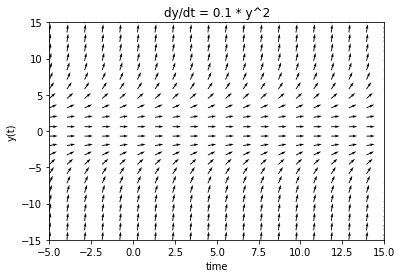

In [2]:
def modelo2(y, t):
    dydt = 0.1*y**2
    return dydt

t0, tf, h = -5, 15, 1
t = np.arange(t0, tf+h, h)
ymin, ymax, ystep = -15, 15, 1.3
y = np.arange(ymin, ymax+ystep, ystep)

for y0 in y:
    line = odeint(modelo2, y0, t)
    #plt.plot(t, line, 'b')

x = np.linspace(t0, tf, 20)
X, Y = np.meshgrid(x, y)

U = 1
V = modelo2(Y, None)
N = np.sqrt(U**2 + V**2) 
U /= N
V /= N

plt.quiver(X, Y, U, V, angles='xy')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.axis([t0, tf, ymin, ymax])
plt.title('dy/dt = 0.1 * y^2')
plt.show()

C:\Users\bruno\AppData\Local\Temp/ipykernel_3116/1747592565.py:4: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y = dev_df['y'].values.astype(np.integer)


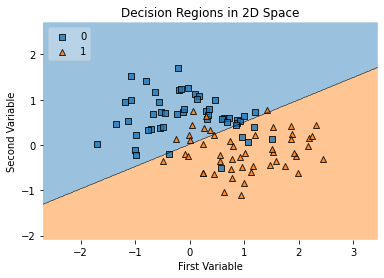

In [3]:
dev_df = pd.read_csv("data/dev_data.csv")

X = dev_df.drop('y', axis = 1).values
y = dev_df['y'].values.astype(np.integer)

clf_MLP = MLPClassifier(random_state=1, max_iter=1000, activation = 'logistic').fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=clf_MLP, legend=2)

# Adding axes annotations
plt.xlabel('First Variable')
plt.ylabel('Second Variable')
plt.title('Decision Regions in 2D Space')
plt.show()

(791537, 240)


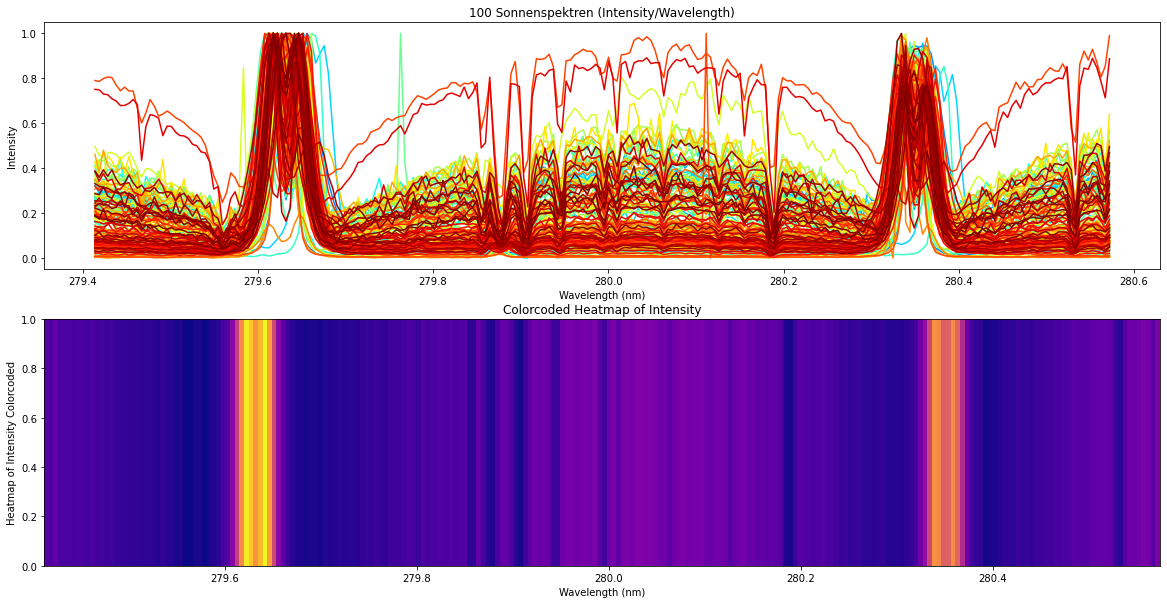

In [4]:
#Load data in numpy and maybe we need a dataframe
data = np.load("./data/iris_sun_spectra.npy")
df = pd.DataFrame(data)

#select n = 200 entries with a seed
n = 200
np.random.seed(42)
subsample = data[np.random.choice(data.shape[0], n, replace=False), :]
print(data.shape)
df_subsample = pd.DataFrame(subsample)

avg = []
resizer = np.linspace(279.414, 280.572, 240)
    
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2)

colors = plt.cm.jet(np.linspace(0.25,1,n))
for i in range(0,n):
    ax[0].plot(resizer, subsample[i], color=colors[i])
    

ax[0].set_xlabel("Wavelength (nm)")
ax[0].set_ylabel("Intensity")
ax[0].set_title("100 Sonnenspektren (Intensity/Wavelength)")


for i in range(0,subsample.shape[1]):
    avg.append(np.mean(subsample[:,i]))

#for i in range(0,n):
 #   ax[1].plot(resizer, subsample[i], color="lightgrey")

#ax[1].plot(resizer, avg, color="black")
#ax[1].set_xlabel("Wavelength (nm)")
#ax[1].set_ylabel("Intensity")
#ax[1].set_title("Durchschnittlicher Sonnenspektrum (Intensity/Wavelength)")

for i in range(0,200):
    x = resizer
    y = subsample[i]

    extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
    ax[1].imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
    #ax.set_yticks([])
    ax[1].set_xlim(extent[0], extent[1])
    
ax[1].set_xlabel("Wavelength (nm)")
ax[1].set_ylabel("Heatmap of Intensity Colorcoded")
ax[1].set_title("Colorcoded Heatmap of Intensity")

#sn.pairplot(subsample, hue="alter", palette = "ch:s=.55,rot=-.55", height=1.5)
plt.show()

In [24]:
import pandas as pd
import plotly.graph_objects as go

# Impor der CSV-Daten in ein Dataframe
df_tax = pd.read_excel("./data/Auswertung_Forschungsarbeit.xlsx")
df_tax['Alter'] = df_tax['stojahr'].astype(int) - df_tax['Jahrgang'].astype(int)
df_tax = df_tax.rename(columns={"stojahr": "Steuerjahr", "faeinksteuertot": "Einkommenssteuer"})

print(df_tax)

       stsadrid  Steuerjahr  Einkommenssteuer  FaVermSteuerTot  Jahrgang  \
0             1        2000           1954.85             0.00      1939   
1             2        2000           1539.05             0.00      1942   
2             2        2001           1979.20             0.00      1942   
3             2        2002           2193.80             0.00      1942   
4             2        2003           3888.25             0.00      1942   
...         ...         ...               ...              ...       ...   
64350   1118526        2020            533.10             0.00      1994   
64351   1118527        2020              0.00            38.85      1994   
64352   1118528        2020              0.00             0.00      2000   
64353   1118539        2020              0.00             0.00      1987   
64354   1118558        2020            190.00             0.00      1990   

      SEX_CD       Zuzug Ort      Zuzug     Wegzug    Wegzug Ort ZIVIL_CD  \
0         

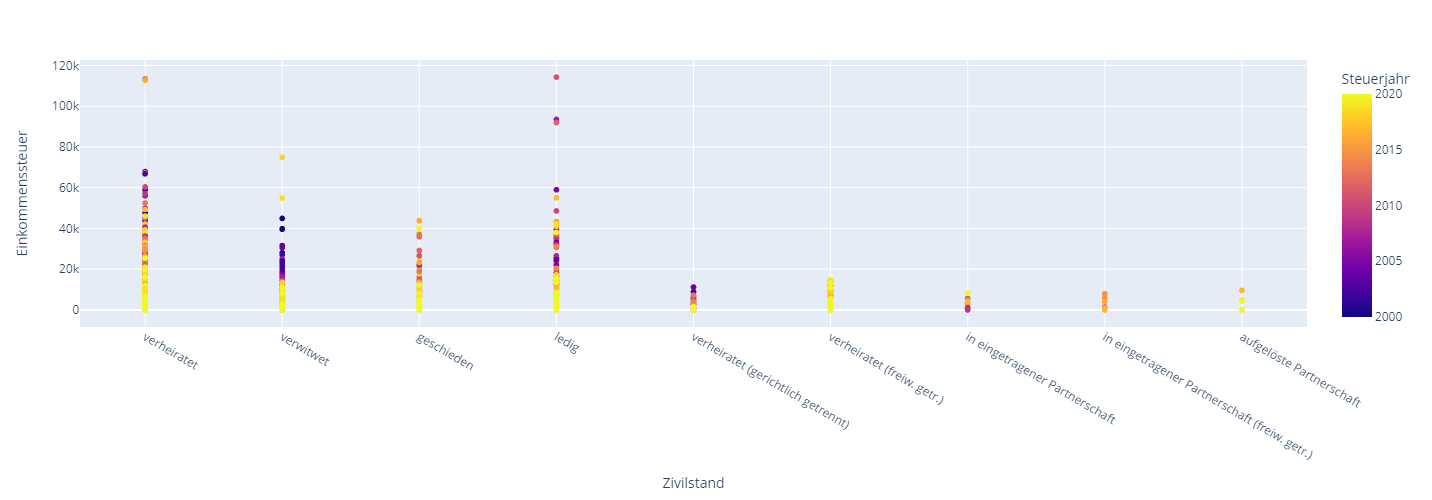

In [21]:
fig = px.scatter(df_tax, x="Zivilstand", y="Einkommenssteuer", color="Steuerjahr")
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
)
fig.show()

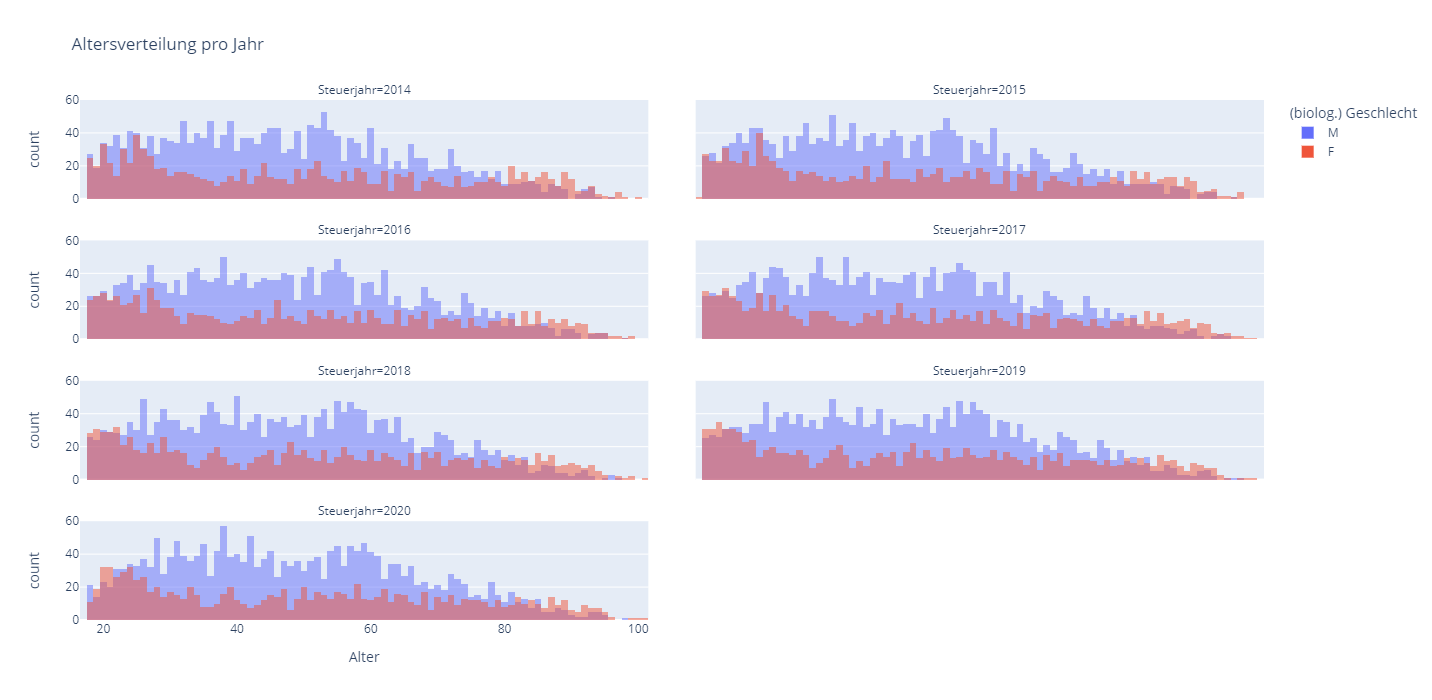

In [49]:
#print(df.head(5))
df_tax_onlyrecent_years = df_tax[df_tax.Steuerjahr >= 2014].sort_values(by="Steuerjahr")
df_tax_onlyrecent_years["(biolog.) Geschlecht"] = df_tax_onlyrecent_years["SEX_CD"]
fig = px.histogram(df_tax_onlyrecent_years, x="Alter", facet_col="Steuerjahr", facet_col_wrap=2,
              facet_row_spacing=0.08,
              facet_col_spacing=0.04,
              height=700, width=1000,
              color="(biolog.) Geschlecht",
              barmode="overlay",
              title="Altersverteilung pro Jahr")

fig.show()